In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=yf.download("^HSI", start="2001-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,15089.849609,15089.849609,14865.660156,14869.940430,14869.940430,0
2001-01-03,14751.330078,14751.330078,14512.709961,14589.580078,14589.580078,0
2001-01-04,15060.599609,15312.610352,15060.599609,15235.030273,15235.030273,0


#### Generating the rolling returns for window of 20 and 50 days

In [7]:
df["MA_20"]=df["Adj Close"].rolling(20).mean()
df["MA_50"]=df["Adj Close"].rolling(50).mean()


In [8]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA_20,MA_50
Date,,,,,,,,
2001-01-02,15089.849609,15089.849609,14865.660156,14869.940430,14869.940430,0,NaN,NaN
2001-01-03,14751.330078,14751.330078,14512.709961,14589.580078,14589.580078,0,NaN,NaN
2001-01-04,15060.599609,15312.610352,15060.599609,15235.030273,15235.030273,0,NaN,NaN


In [9]:
# Lets drop the na values

df=df.dropna()

#### Since we are gonna be working with adj close, MA 20 and 50 columns, we gonna slice the df and choose only these columns for further analysis

In [10]:
df=df[["Adj Close","MA_20","MA_50"]]

In [11]:
df.head()

,Adj Close,MA_20,MA_50
Date,,,
2001-03-15,13504.169922,14535.043896,15203.713594
2001-03-16,13522.040039,14429.630420,15176.755586
2001-03-19,13457.690430,14327.966943,15154.117793
2001-03-20,13223.860352,14212.791943,15113.894395
2001-03-21,13154.440430,14102.938477,15068.030996


#### Coding the buy and sell signals: 

##### If short term MA > long term MA, buy 
##### If Long MA > Short, sell

In [13]:
Buy= [] # first creating 2 empty lists
Sell=[]

for i in range(len(df)):
    if df.MA_20.iloc[i] > df.MA_50.iloc[i] \
    and df.MA_20.iloc[i-1] < df.MA_50.iloc[i-1]:
        Buy.append(i)
    if df.MA_20.iloc[i] < df.MA_50.iloc[i] \
    and df.MA_20.iloc[i-1] > df.MA_50.iloc[i-1]:
        Sell.append(i)


In [19]:
# Row numbers where the above conditions are fulfilled

Buy


[37,
 156,
 246,
 404,
 534,
 803,
 975,
 1022,
 1165,
 1316,
 1503,
 1601,
 1750,
 1915,
 1984,
 2223,
 2295,
 2432,
 2488,
 2629,
 2678,
 2795,
 2999,
 3054,
 3131,
 3227,
 3375,
 3415,
 3469,
 3602,
 3699,
 3765,
 3910,
 4239,
 4369,
 4402,
 4512,
 4571,
 4627,
 4721,
 4743,
 4749,
 4798,
 4801,
 4841]

#### Plotiing the strategy

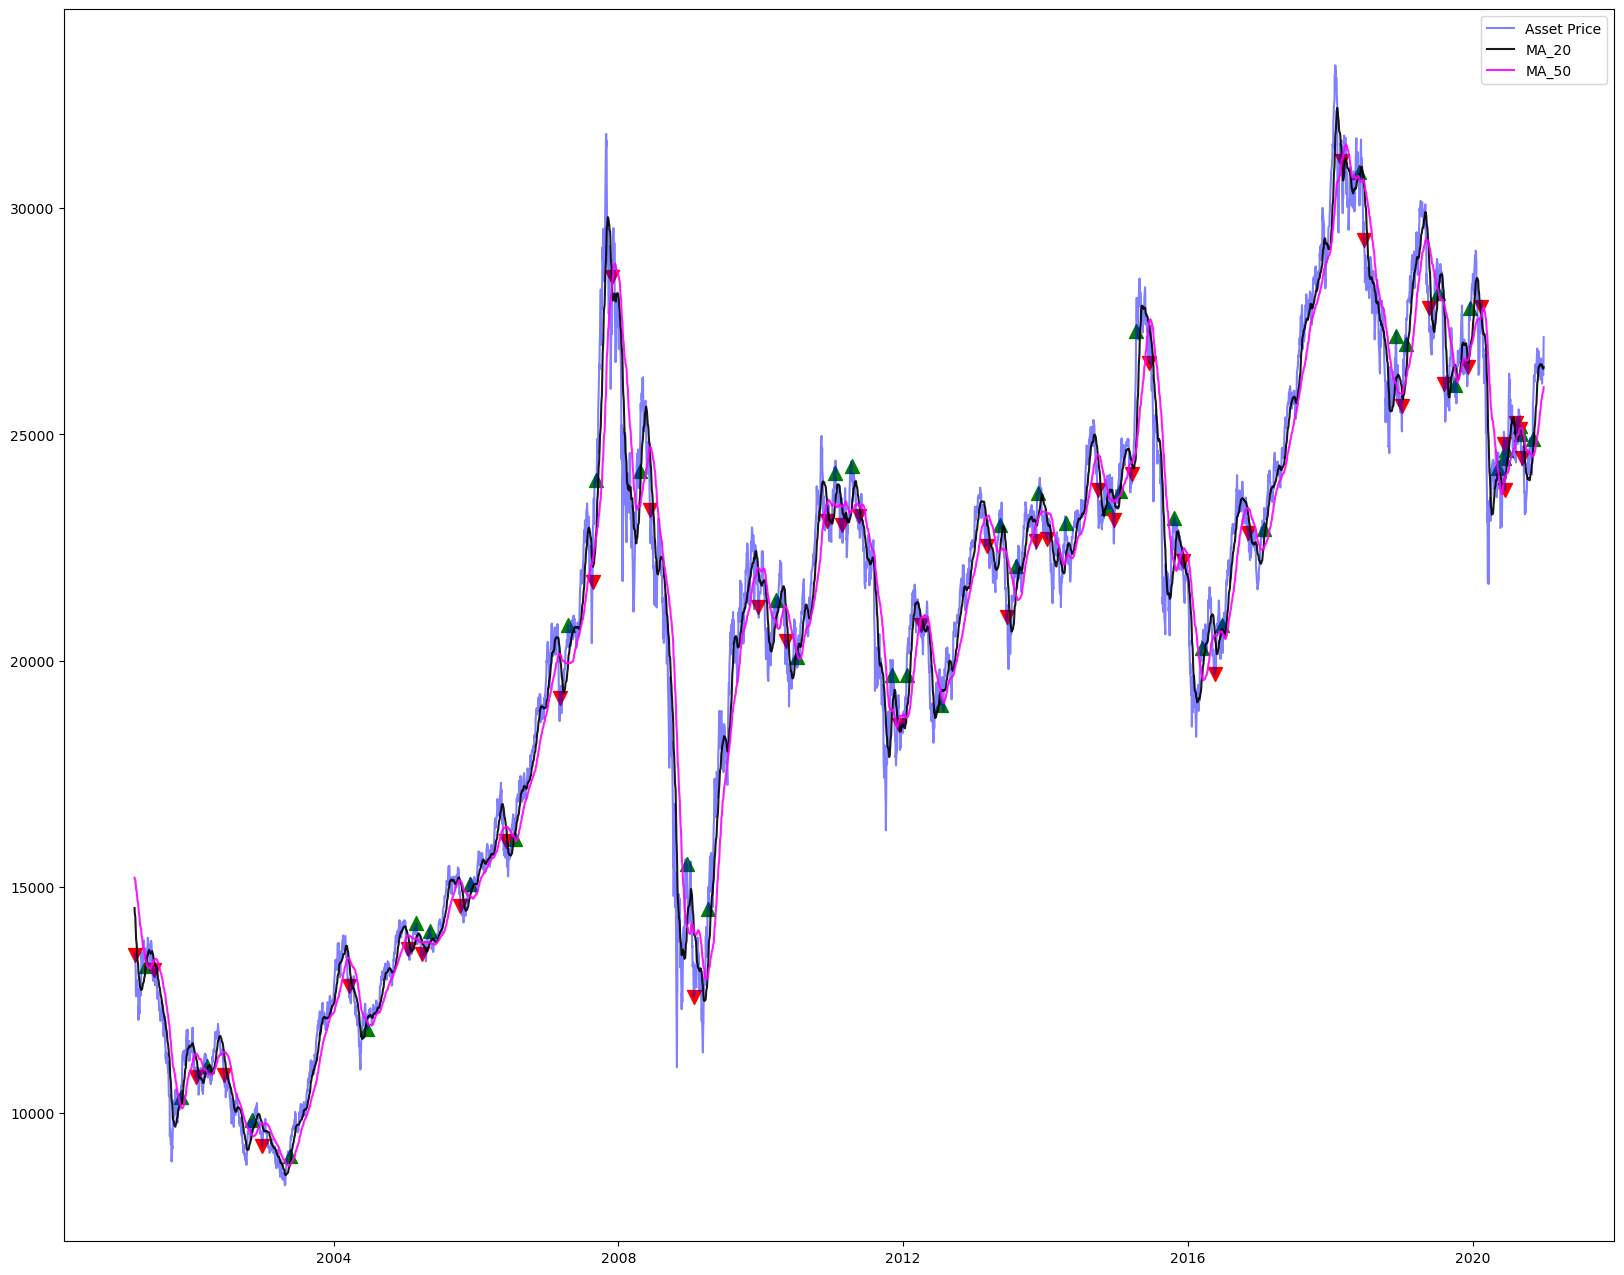

In [26]:
plt.figure(figsize=(20,16)) # If you wanna change the plot size, this should always be at the first
plt.plot(df["Adj Close"], label="Asset Price", c="blue", alpha=0.5) # alpha is used to make the lines more transparent. Max 
                                                                        # alpha is 1
plt.plot(df["MA_20"], label="MA_20", c="k", alpha=0.9)
plt.plot(df["MA_50"], label="MA_50", c="magenta", alpha=0.9)
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]["Adj Close"], marker="^", color="g", s=100) # the scatter plot uses x and y axis
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]["Adj Close"], marker="v", color="r", s=100)
plt.legend()
plt.show()